# Import

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tqdm import tqdm

# Load dataset

In [3]:
data = load_iris()
x = data.data
y = data.target

# Convert to DataFrame (Best for visualization)

In [4]:
df = pd.DataFrame(x, columns=data.feature_names)
df["species"] = y

# Convert to DataFrame (Best for visualization)

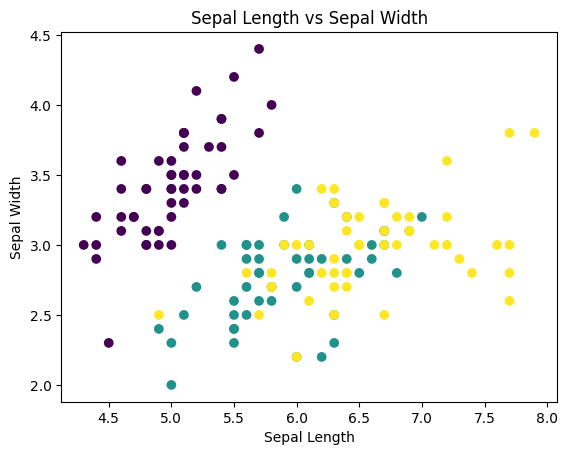

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=y)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.show()


# Pair Plot (BEST Visualization for Iris)

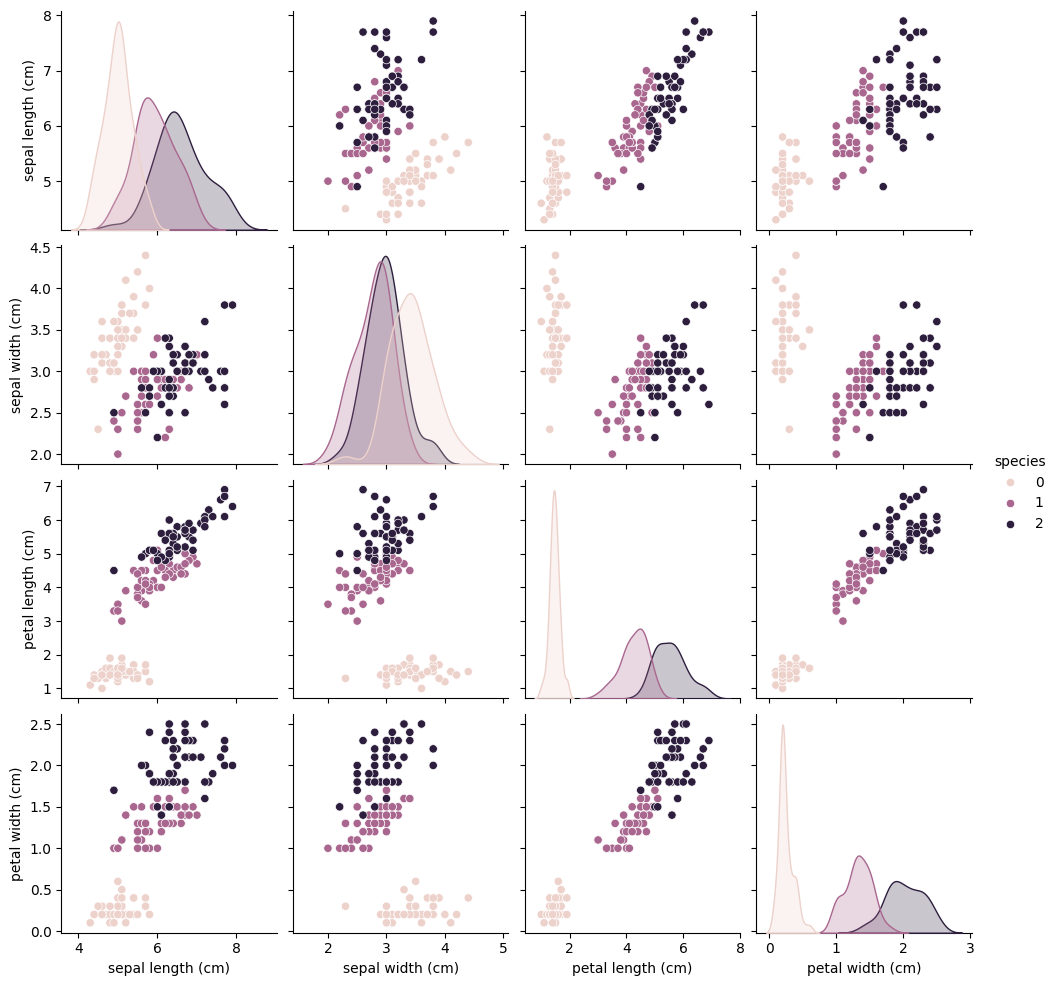

In [6]:
import seaborn as sns

sns.pairplot(df, hue="species")
plt.show()


# Histogram (Feature Distribution)

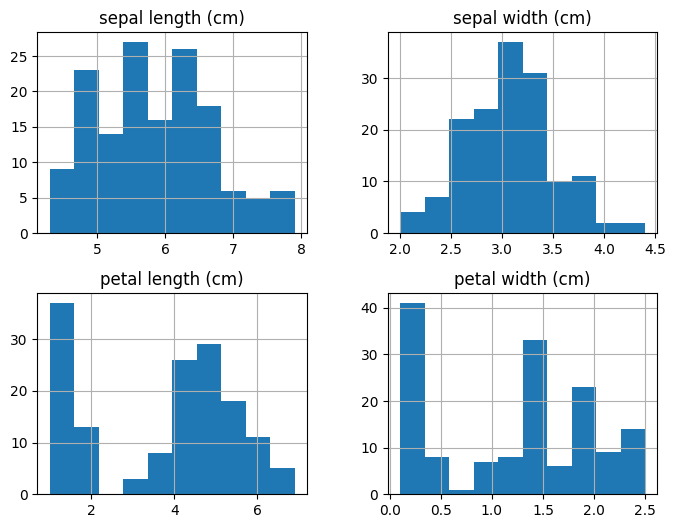

In [7]:
df.iloc[:, :-1].hist(figsize=(8,6))
plt.show()

# Box Plot (Outliers & Spread)

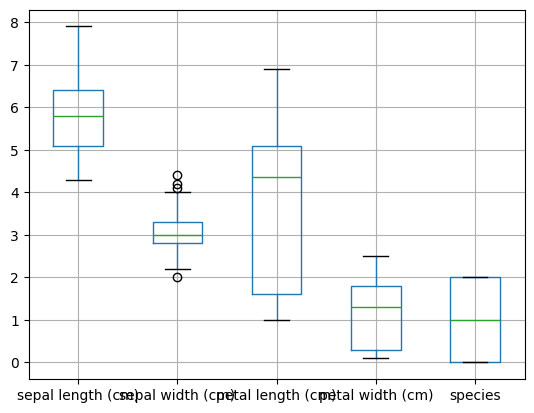

In [8]:
plt.figure()
df.boxplot()
plt.show()

# Correlation Heatmap (Feature Relationship)

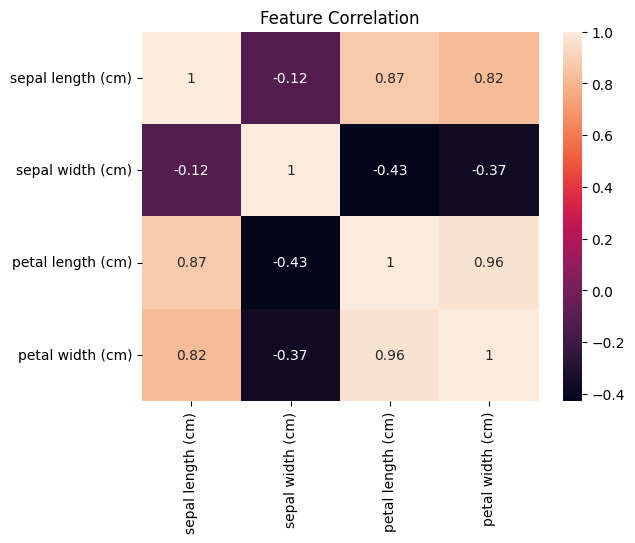

In [9]:
plt.figure()
sns.heatmap(df.iloc[:, :-1].corr(), annot=True)
plt.title("Feature Correlation")
plt.show()

# 2D Visualization Using PCA (Very Professional)

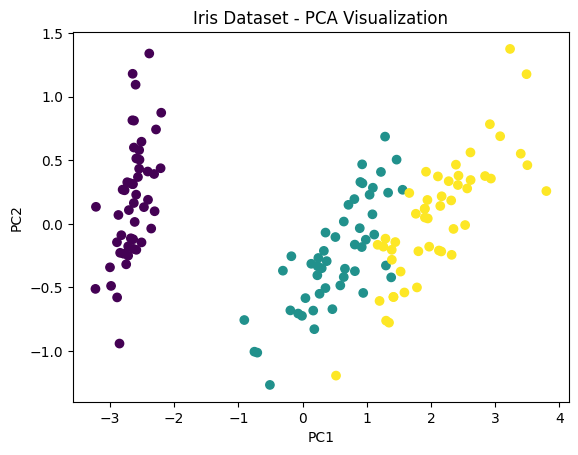

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris Dataset - PCA Visualization")
plt.show()

# Split Dataset

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Stratified K-Fold

In [12]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Define Model 

In [14]:
models = {
    "Logistic Regression" : Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression())
    ]),
    "SVM" : Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVC())
    ]),
    "Random Forest" : RandomForestClassifier(
        n_estimators = 200,
        random_state = 42
    ),
    "Gradient boossting" : GradientBoostingClassifier(
        random_state = 42
    ),
    "Stack_model" : Pipeline([
        ('scaler', StandardScaler()),
        ('model', StackingClassifier(
            estimators = [
                ("lr", LogisticRegression(max_iter=500)),
                ("rf", RandomForestClassifier(n_estimators=200, random_state=42)),
                ("gbr", GradientBoostingClassifier(random_state=42))
            ],
            final_estimator=LogisticRegression(),
            n_jobs = -1
        ))
    ]) 
}

# Cross-Validation Evaluation

In [15]:
results = []

for name, model in tqdm(models.items(), desc="Training Models"):
    scores = cross_val_score(
        model,
        x_train,
        y_train,
        cv=cv,
        scoring = 'accuracy',
    )

    results.append({
        'model' : name,
        'mean_accuracy' : np.mean(scores),
        'std_accuracy' : np.std(scores)
    })  

   


Training Models: 100%|██████████| 5/5 [00:38<00:00,  7.68s/it]


# Results Table

In [17]:
results_df = pd.DataFrame(results).sort_values(
    by = "mean_accuracy",
    ascending = False
)
print("\nCross-Validated Model Performance:\n")
print(results_df.to_string(index=False))


Cross-Validated Model Performance:

              model  mean_accuracy  std_accuracy
Logistic Regression       0.941667      0.042492
                SVM       0.941667      0.042492
 Gradient boossting       0.941667      0.042492
        Stack_model       0.941667      0.042492
      Random Forest       0.933333      0.033333


# Model training on full training data

In [18]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Predict test dataset

In [19]:
result = lg.predict(x_test)
print("\nLogistic Regression Test Set Predictions:\n", result)


Logistic Regression Test Set Predictions:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [20]:
print("\nTest Set:", y_test.tolist())


Test Set: [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]


# Save model 

In [21]:
import joblib
joblib.dump(lg,'models/Iris_model.pkl') 

['models/Iris_model.pkl']